In [3]:
from __future__ import division

import PerformParser as pp
import pandas as pd
import numpy as np
from scipy import signal as sig
import performFun as pF

import bokeh.plotting as bkP
import bokeh.models as bkM
from bokeh.palettes import Spectral6
bkP.output_notebook() 

import cv2
import os
import scipy.io as sio
import matplotlib

%matplotlib notebook
from ipywidgets import interact
import filterpy as fP
from bokeh.io import push_notebook

import Quaternion as qu

import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
bkP.output_notebook()


BokehJS successfully loaded.

BokehJS successfully loaded.

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()


In [5]:
model.add(Dense(output_dim = 31, input_dim = 3))
# model.add(Activation("relu"))
model.add(Dense(31))
model.add(Activation("linear"))
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

In [6]:
trainingSet = sio.loadmat('/Users/kamranbinaee/Downloads/Reflectance&XYZ.mat')
testSet = sio.loadmat('/Users/kamranbinaee/Downloads/Reflectance&XYZtesting.mat')

In [7]:
#trainingSet.keys()
#trainingSet['Reflectance'].shape

#testSet['imgte'].shape
testSet['XYZte'].shape

#colorImage1 = rawDataFile['XYZte']
#colorImage2 = rawDataFile['XYZte1']
#colorImage3 = rawDataFile['XYZtr']

#reflectance1 = rawDataFile['imgte']
#reflectance2 = rawDataFile['imgte1']
#reflectance3 = rawDataFile['imgtr']


(3, 262144)

In [8]:
#model.train_on_batch(trainingSet['XYZ'].T, trainingSet['Reflectance'].T)
tempVar1 = trainingSet['XYZ'].T
tempVar2 = trainingSet['Reflectance'].T
model.fit(tempVar1, tempVar2, batch_size = 512, nb_epoch = 3)

Epoch 1/3
3145728/3145728 [==============================] - 22s - loss: 0.1406 - acc: 0.3469    
Epoch 2/3
3145728/3145728 [==============================] - 19s - loss: 0.0046 - acc: 0.4174    
Epoch 3/3
3145728/3145728 [==============================] - 18s - loss: 0.0021 - acc: 0.4709    


In [9]:
loss_and_metrics = model.evaluate(tempVar1, tempVar2, batch_size=512)

3145728/3145728 [==============================] - 10s    


In [10]:
loss_and_metrics

[0.0015018465957889286, 0.54667727152506507]

In [11]:
#model.metrics_names

In [12]:
tempVar3 = testSet['XYZte'].T
output = model.predict(tempVar3)

(262144, 31)
(512, 512)
0.0133004062747 101.706446581


<IPython.core.display.Javascript object>


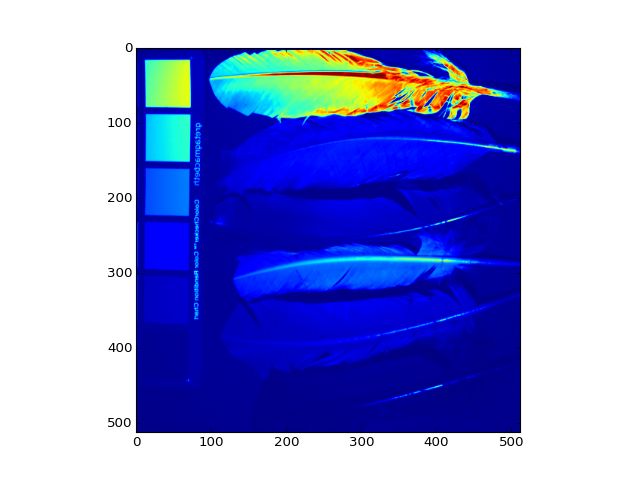

In [13]:
#
print output.shape

img = np.reshape(output[:,0],(512,512))

print img.shape

print np.min(tempVar3), np.max(tempVar3) 
plt.imshow(img)
plt.show()

In [14]:
tempVar4 = testSet['imgte'].T
RMSE = np.sqrt(sum(np.power(np.abs(tempVar4 - output), 2))/31.)
print 'RMSE Vector = ', RMSE
print '\nMean RMSE is =', np.mean(RMSE)

RMSE Vector =  [ 3.42189672  7.66821628  2.85000936  1.64044368  6.64567849  1.32996635
  2.79941945  2.9243007   5.15787647  5.02558412  4.02493515  3.15536819
  5.27409762  2.74263553  3.69332025  1.75480329  2.48317823  3.12422325
  2.61399896  2.2008161   2.2969316   5.26477918  3.43199296  3.48761759
  4.09616219  4.55048174  4.75006674  4.61388336  5.3338534   6.58816479
  8.25857079]

Mean RMSE is = 3.97429911424


In [15]:
#testSet['imgte']

In [16]:
#print(RMSE)